# Trabalhando com Planilhas do Excel

In [1]:
import pandas as pd

In [2]:
#leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [5]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
# Juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [7]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [8]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [9]:
# Obtendo uma amostra do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
76,Recife,2019-01-01,17.86,980,5
235,Natal,2019-01-03,41.84,1034,1
198,Natal,2019-01-02,13.65,1037,3
37,Aracaju,2018-01-01,152.74,1522,9
105,Salvador,2019-01-01,32.83,1037,1


In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [11]:
df["LojaID"] = df["LojaID"].astype("object")

In [12]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

### Tratando Valores Faltantes

In [14]:
#consultando linhas com valores faltantes
df.isnull().sum() 

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [15]:
df["Vendas"].mean()

122.61180089485438

In [17]:
#substituir balores nulos pela media
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [18]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [19]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
119,Natal,2019-01-02,136.37,1034,2
126,Fortaleza,2019-03-02,41.87,980,8
85,Natal,2019-01-02,16.88,1035,3
93,Recife,2019-01-01,17.45,980,6
134,Natal,2019-01-02,125.90,1036,1


In [20]:
#substituindo valores nulos por zero
df["Vendas"].fillna(0,inplace=True)

In [24]:
#apagando as linhas com valores nulos com base em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [25]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

### Criando colunas novas

In [26]:
#criar colunas
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [27]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [29]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [30]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [31]:
#retornar a maior receita
df["Receita"].max()

3544.0

In [32]:
#retornar a menor receita
df["Receita"].min()

3.34

In [33]:
#nlargest - top 3 maiores receitas
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [34]:
#nsmalest - top 3 menores receitas
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [35]:
#agrupamento 
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [36]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


### Trabalhando com datas

In [37]:
#Transformando data para inteiro
df["Data"] = df["Data"].astype("int64")

In [39]:
#verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [40]:
#transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [41]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [43]:
#agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [44]:
#criando uma nova coluna com o ano
df["Ano_venda"] = df["Data"].dt.year

In [45]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0,2019
140,Fortaleza,2019-03-02,166.89,983,5,834.45,5.0,2019
4,Salvador,2019-02-14,19.47,1037,3,58.41,3.0,2019
47,Fortaleza,2019-01-01,13.45,1004,5,67.25,5.0,2019
170,Salvador,2019-01-02,9.26,1035,3,27.78,3.0,2019


In [46]:
#extraindo o mes e o dia
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [47]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Mes_Venda,Dia_Venda
47,Natal,2018-03-13,521.00,854,3,1563.00,3.0,2018,3,13
92,Recife,2019-01-01,163.02,981,4,652.08,4.0,2019,1,1
85,Natal,2019-01-02,16.88,1035,3,50.64,3.0,2019,1,2
64,Salvador,2019-01-01,37.96,1037,3,113.88,3.0,2019,1,1
14,Aracaju,2018-01-01,148.21,1521,3,444.63,3.0,2018,1,1


In [48]:
#retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [55]:
#calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [56]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Mes_Venda,Dia_Venda,diferenca_dias,semestre_venda
25,Natal,2019-01-13,611.00,852,2,1222.00,2.0,2019,1,13,377 days,1
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
191,Natal,2019-01-02,173.59,1034,2,347.18,2.0,2019,1,2,366 days,1
124,Fortaleza,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2,425 days,1
105,Fortaleza,2019-01-01,174.66,1004,1,174.66,1.0,2019,1,1,365 days,1


In [57]:
#criando a coluna trimestre
df["semestre_venda"] = df["Data"].dt.quarter

In [58]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Mes_Venda,Dia_Venda,diferenca_dias,semestre_venda
78,Recife,2019-01-01,238.73,980,3,716.19,3.0,2019,1,1,365 days,1
181,Natal,2019-01-02,244.83,1037,2,489.66,2.0,2019,1,2,366 days,1
108,Recife,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
102,Natal,2019-01-02,40.84,1034,3,122.52,3.0,2019,1,2,366 days,1
119,Natal,2019-01-02,136.37,1034,2,272.74,2.0,2019,1,2,366 days,1


In [59]:
#filtrar as vendas de marco de 2019
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Mes_Venda,Dia_Venda,diferenca_dias,semestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


### Visualização de dados

In [60]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

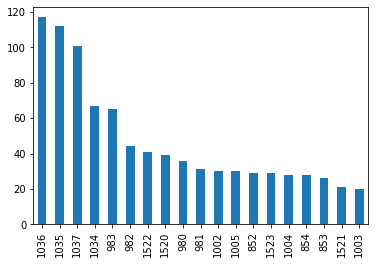

In [62]:
#Grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

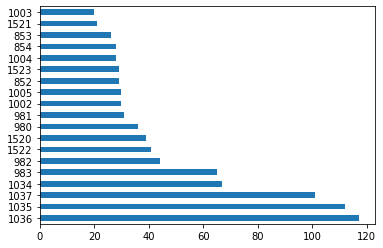

In [64]:
#grafico de barras horizontais
df["LojaID"].value_counts(ascending=False).plot.barh();

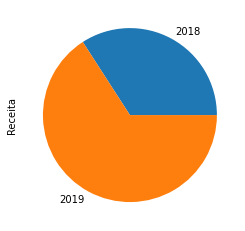

In [65]:
#grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [66]:
#total de vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

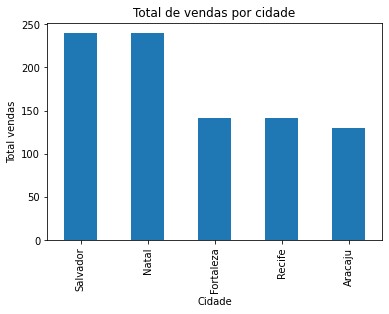

In [67]:
#adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt

df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

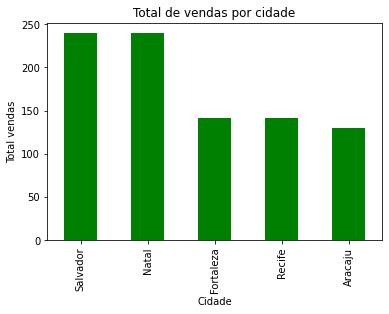

In [68]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="green")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

In [69]:
#alterando o estilo
plt.style.use("ggplot")

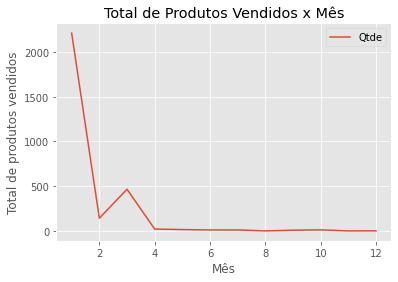

In [71]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title="Total de Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

In [72]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [73]:
#selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_venda"]==2019]

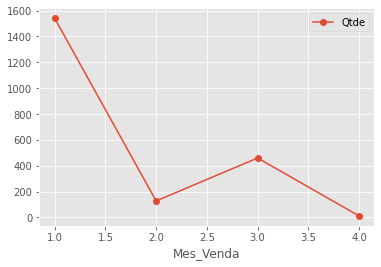

In [75]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="o")
plt.xlabel = "Mês"
plt.ylabel = "Total de produtos vendidos"
plt.legend();

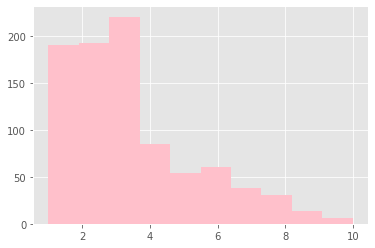

In [77]:
#histograma
plt.hist(df["Qtde"], color="pink");

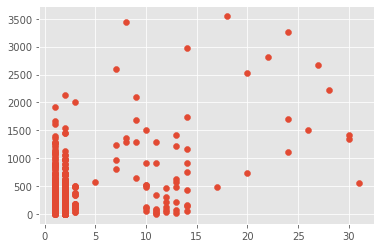

In [79]:
# Gráfico de dispersão
plt.scatter(x = df_2019["Dia_Venda"], y = df_2019["Receita"]);

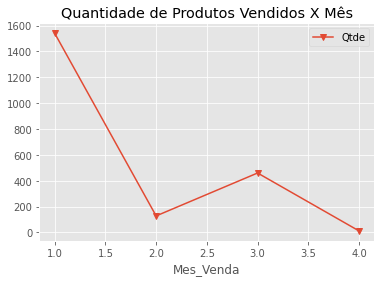

In [80]:
# Salvando em png
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de Produtos Vendidos X Mês")
plt.xlabel = "Mês"
plt.ylabel = "Total de produtos vendidos"
plt.legend()
plt.savefig("grafico qtde x mes.png")